In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-181-g3812a1a Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)


Setup complete ✅ (12 CPUs, 83.5 GB RAM, 24.1/78.2 GB disk)


In [2]:
import os

In [3]:
!unzip /content/drive/MyDrive/degu_dataset.zip

Archive:  /content/drive/MyDrive/degu_dataset.zip
   creating: degu_dataset/
   creating: degu_dataset/dataset/
   creating: degu_dataset/dataset/images/
   creating: degu_dataset/dataset/images/test/
  inflating: degu_dataset/dataset/images/test/245821614_4470788316292946_2025281705560110013_n.jpg  
  inflating: degu_dataset/dataset/images/test/3131626849_9b179f81f4_b_2_Transpose.jpg  
  inflating: degu_dataset/dataset/images/test/336360003_1346474642871361_2672415645274935823_n_10_Transpose.jpg  
  inflating: degu_dataset/dataset/images/test/352546745_589454993291915_8122503881342979361_n.jpg  
  inflating: degu_dataset/dataset/images/test/354269541_999481961223449_7866118366049743435_n.jpg  
  inflating: degu_dataset/dataset/images/test/354401183_3397104107220569_3394932601151945135_n_20_RandomRotate90_RandomBrightnessDark.jpg  
  inflating: degu_dataset/dataset/images/test/354530593_1444772806296794_1901095580468383783_n_25_HorizontalFlip_CLAHE.jpg  
  inflating: degu_dataset/datas

In [4]:
cd /content/yolov5

/content/yolov5


In [13]:
!python train.py --img 640 --batch 40 --epochs 100 --data /content/yolov5/data/classes_degu.yaml --weights yolov5l.pt --cache

train: weights=yolov5l.pt, cfg=, data=/content/yolov5/data/classes_degu.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=40, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-181-g3812a1a Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=

In [16]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp3/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
!python detect.py --weights runs/train/exp3/weights/best.pt --img 640 --conf 0.5 --source /content/yolov5/degu_dataset/dataset/images/test

detect: weights=['runs/train/exp3/weights/best.pt'], source=/content/yolov5/degu_dataset/dataset/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-181-g3812a1a Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/10 /content/yolov5/degu_dataset/dataset/images/test/245821614_4470788316292946_2025281705560110013_n.jpg: 448x640 1 degu, 85.1ms
image 2/10 /content/yolov5/degu_dataset/dataset/images/test/3131626849_9b179f81f4_b_2_Transpose.jpg: 640x448 3 degus, 87.2ms
image 3/10 /content/yolov5/degu_dataset/

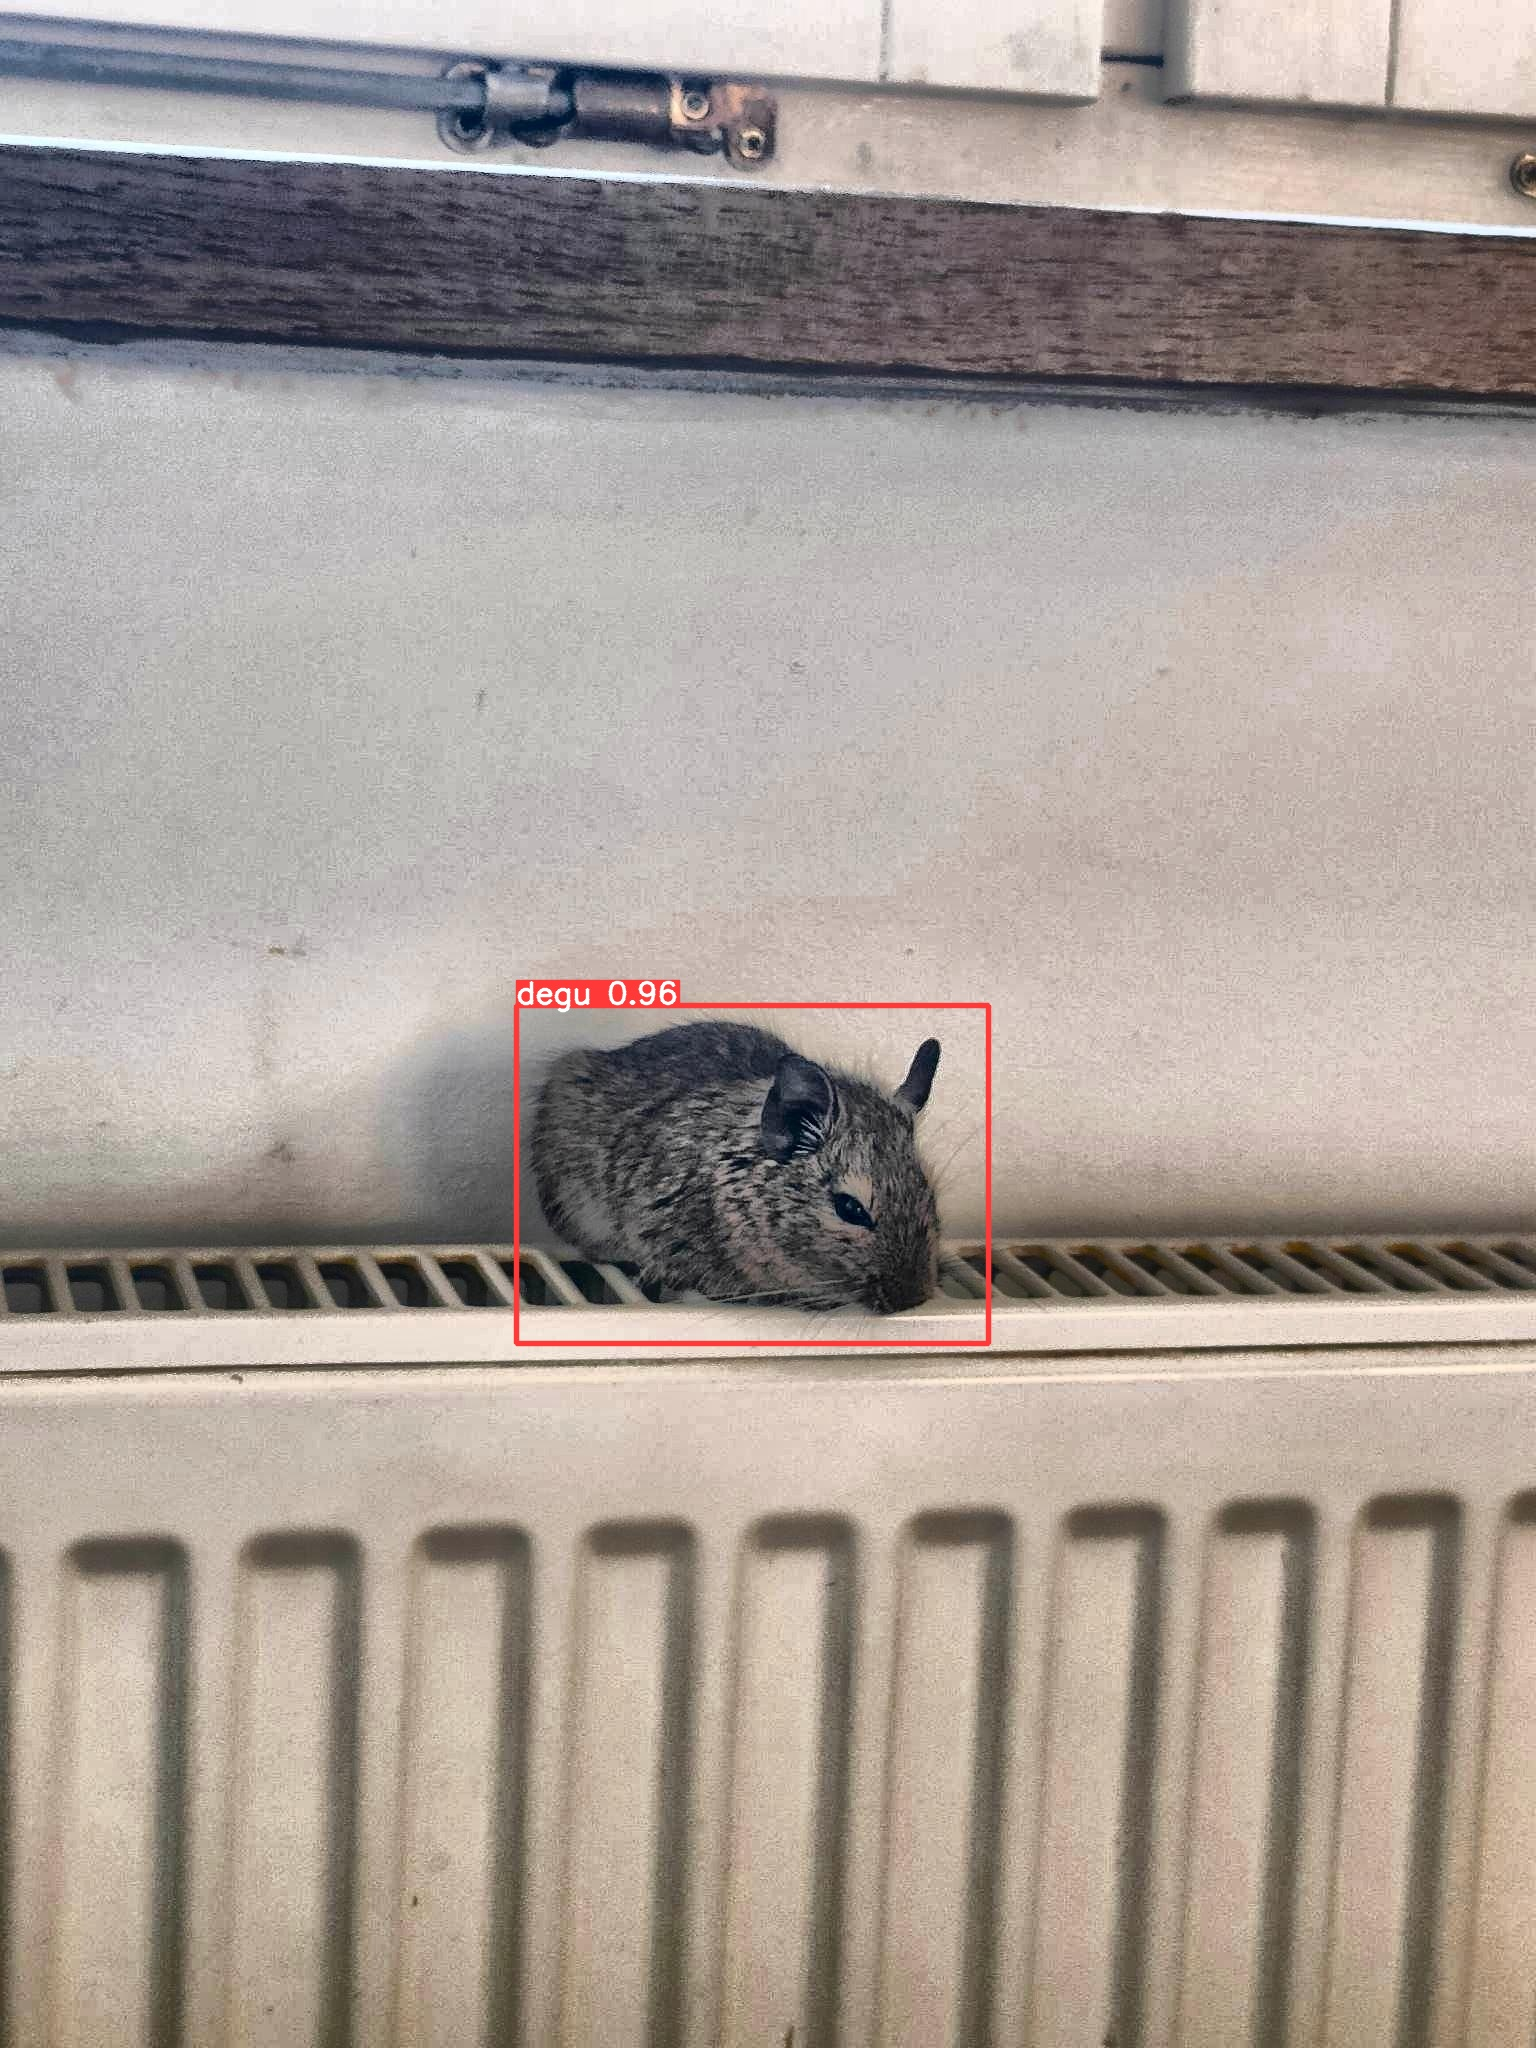

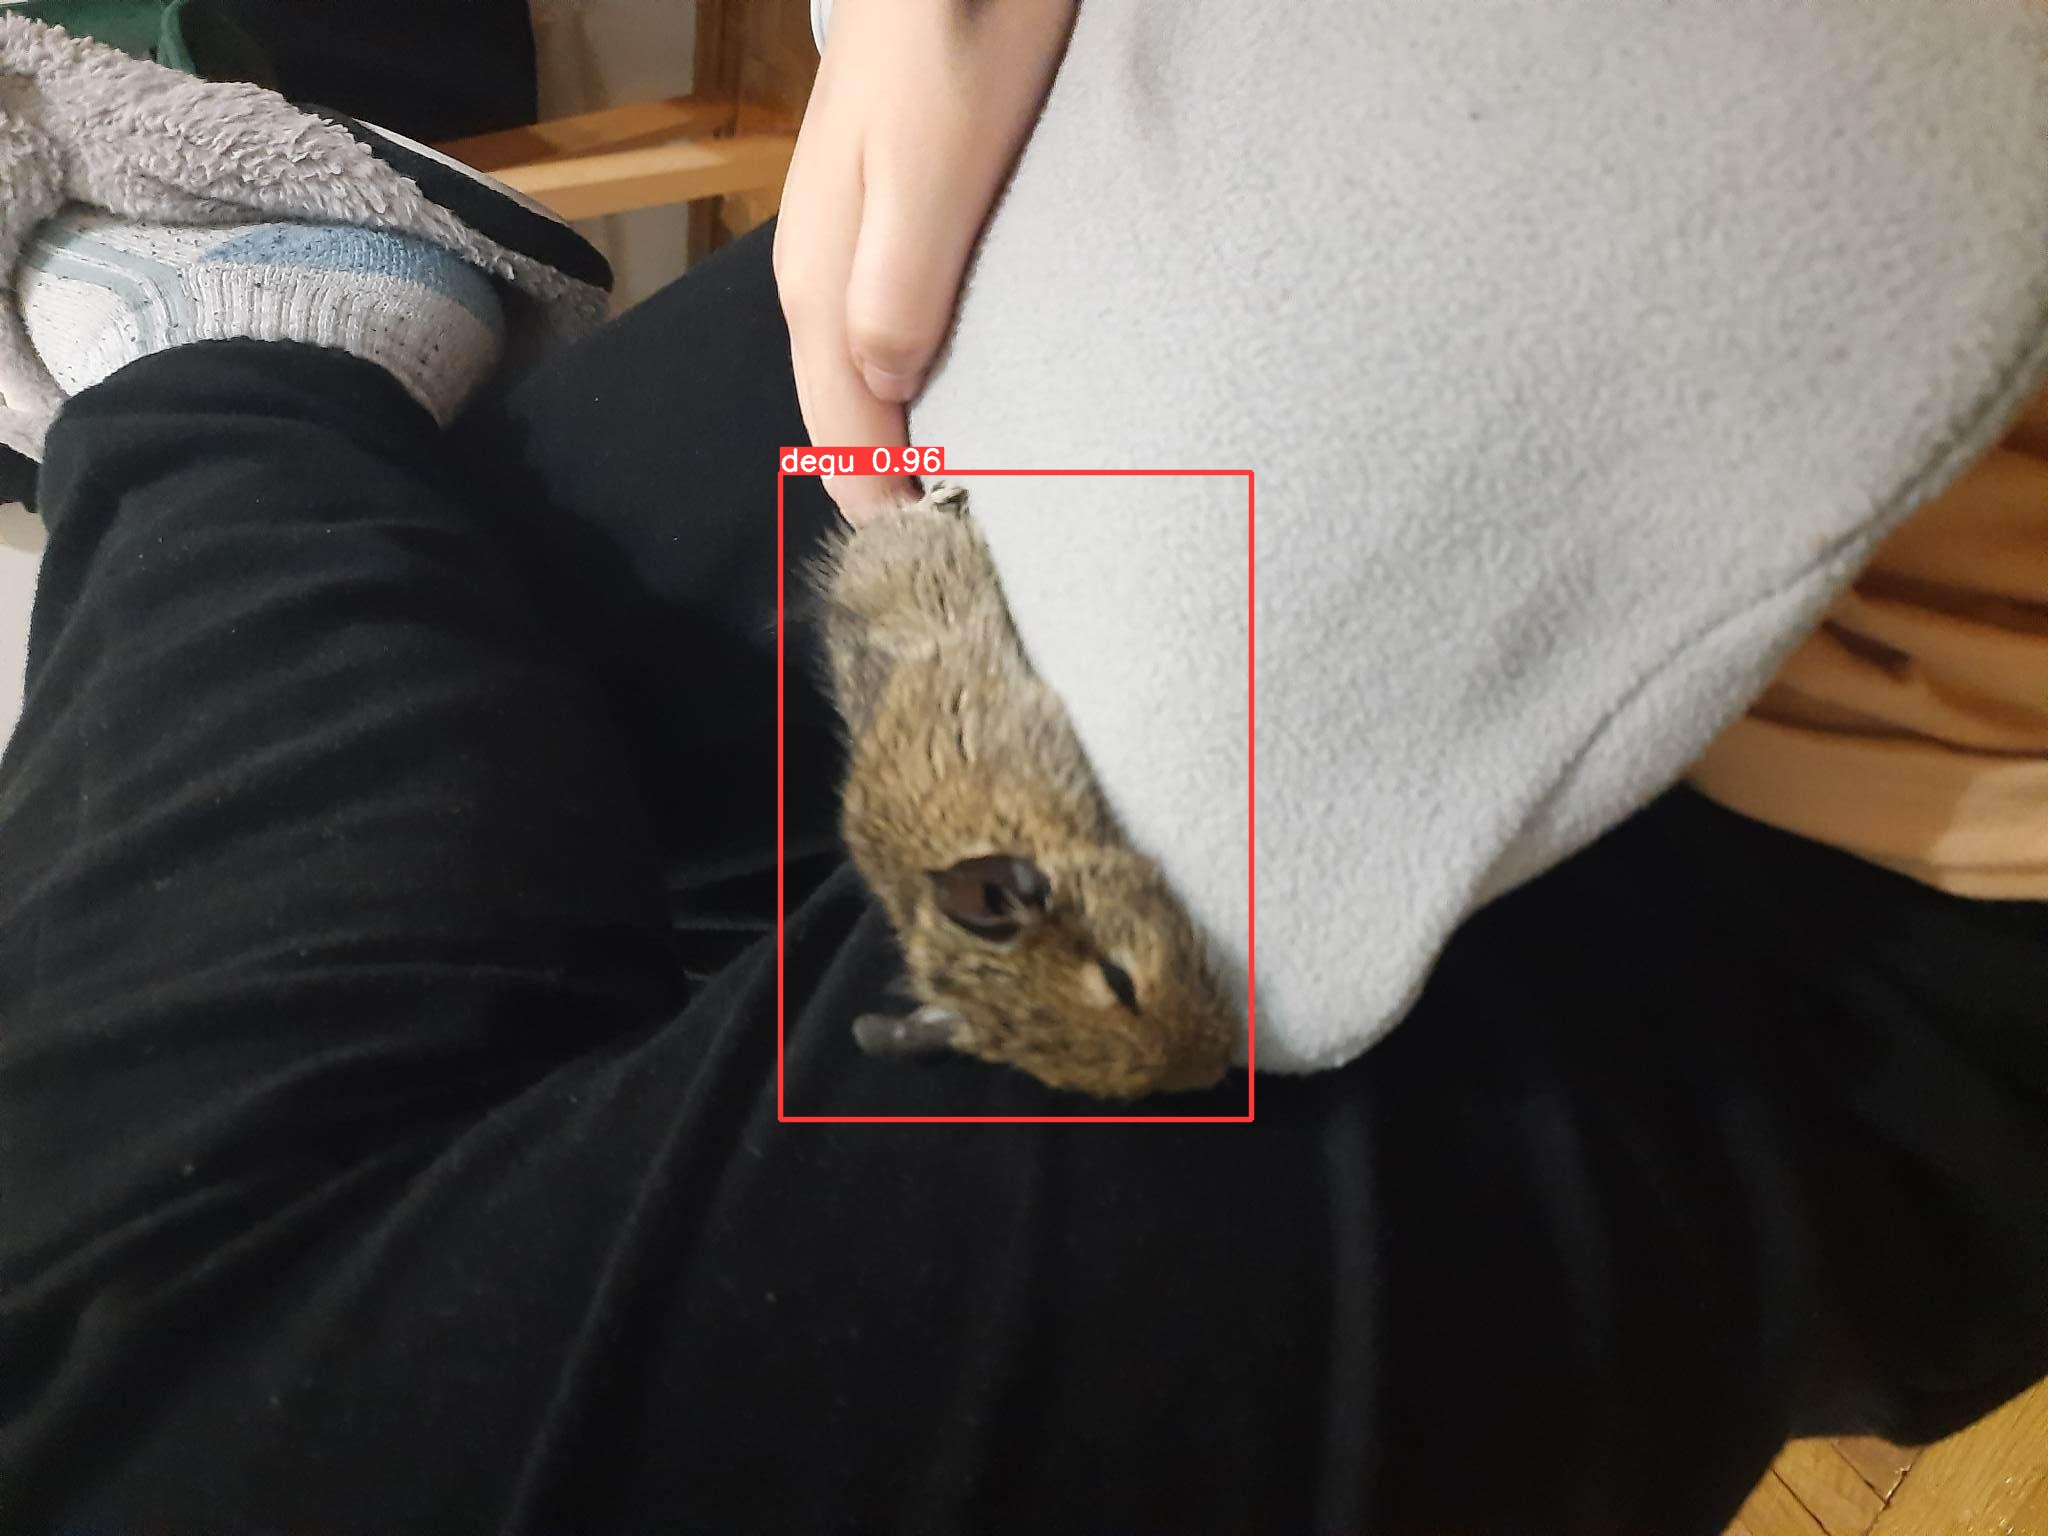

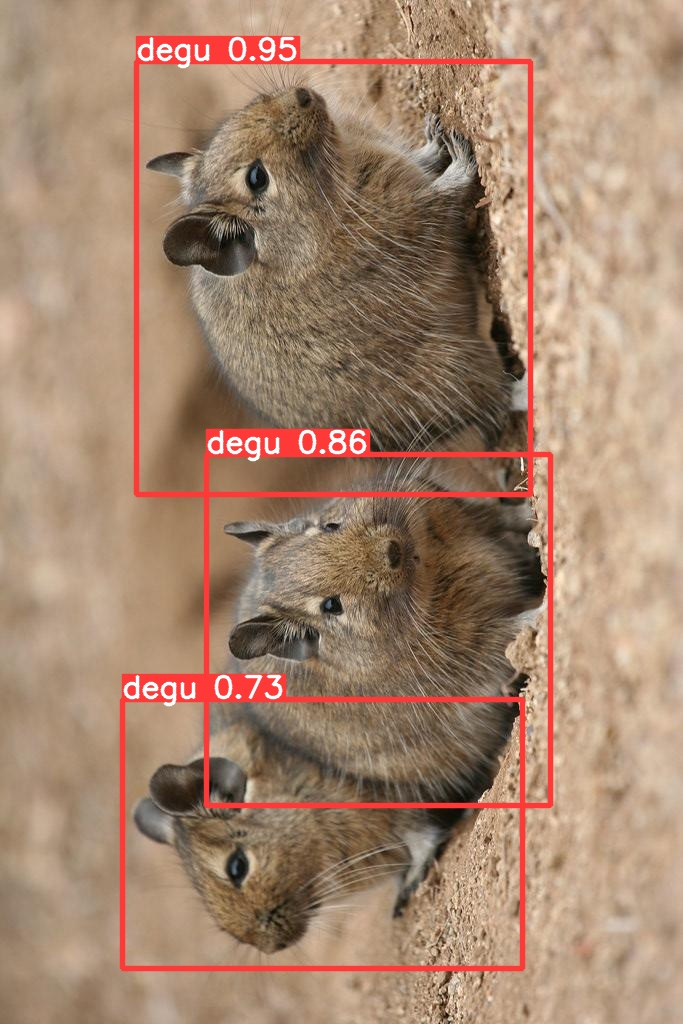

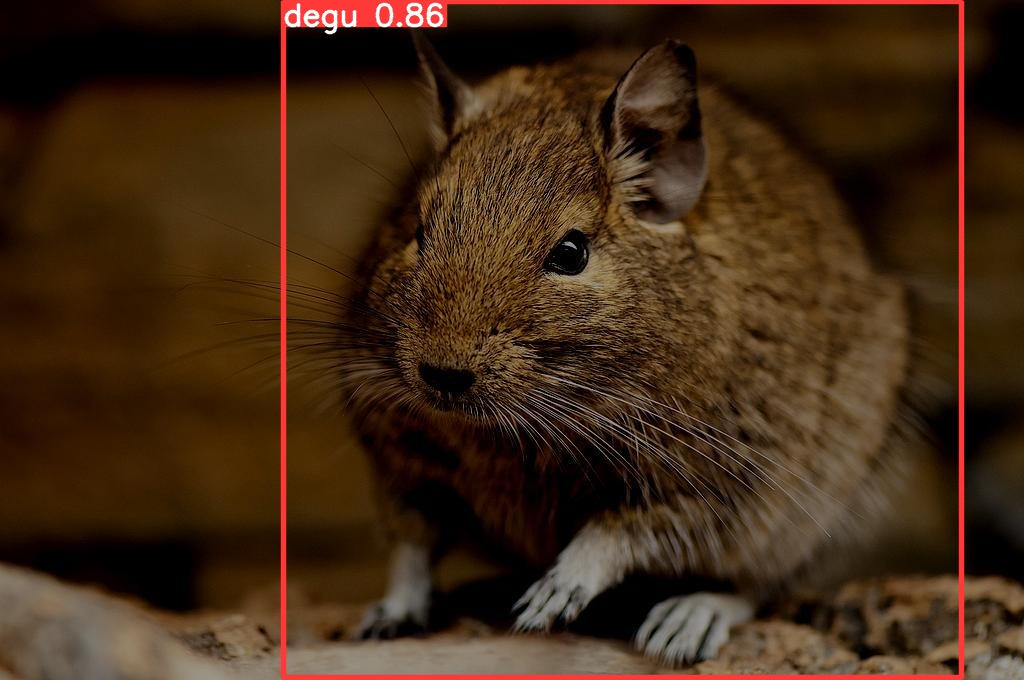

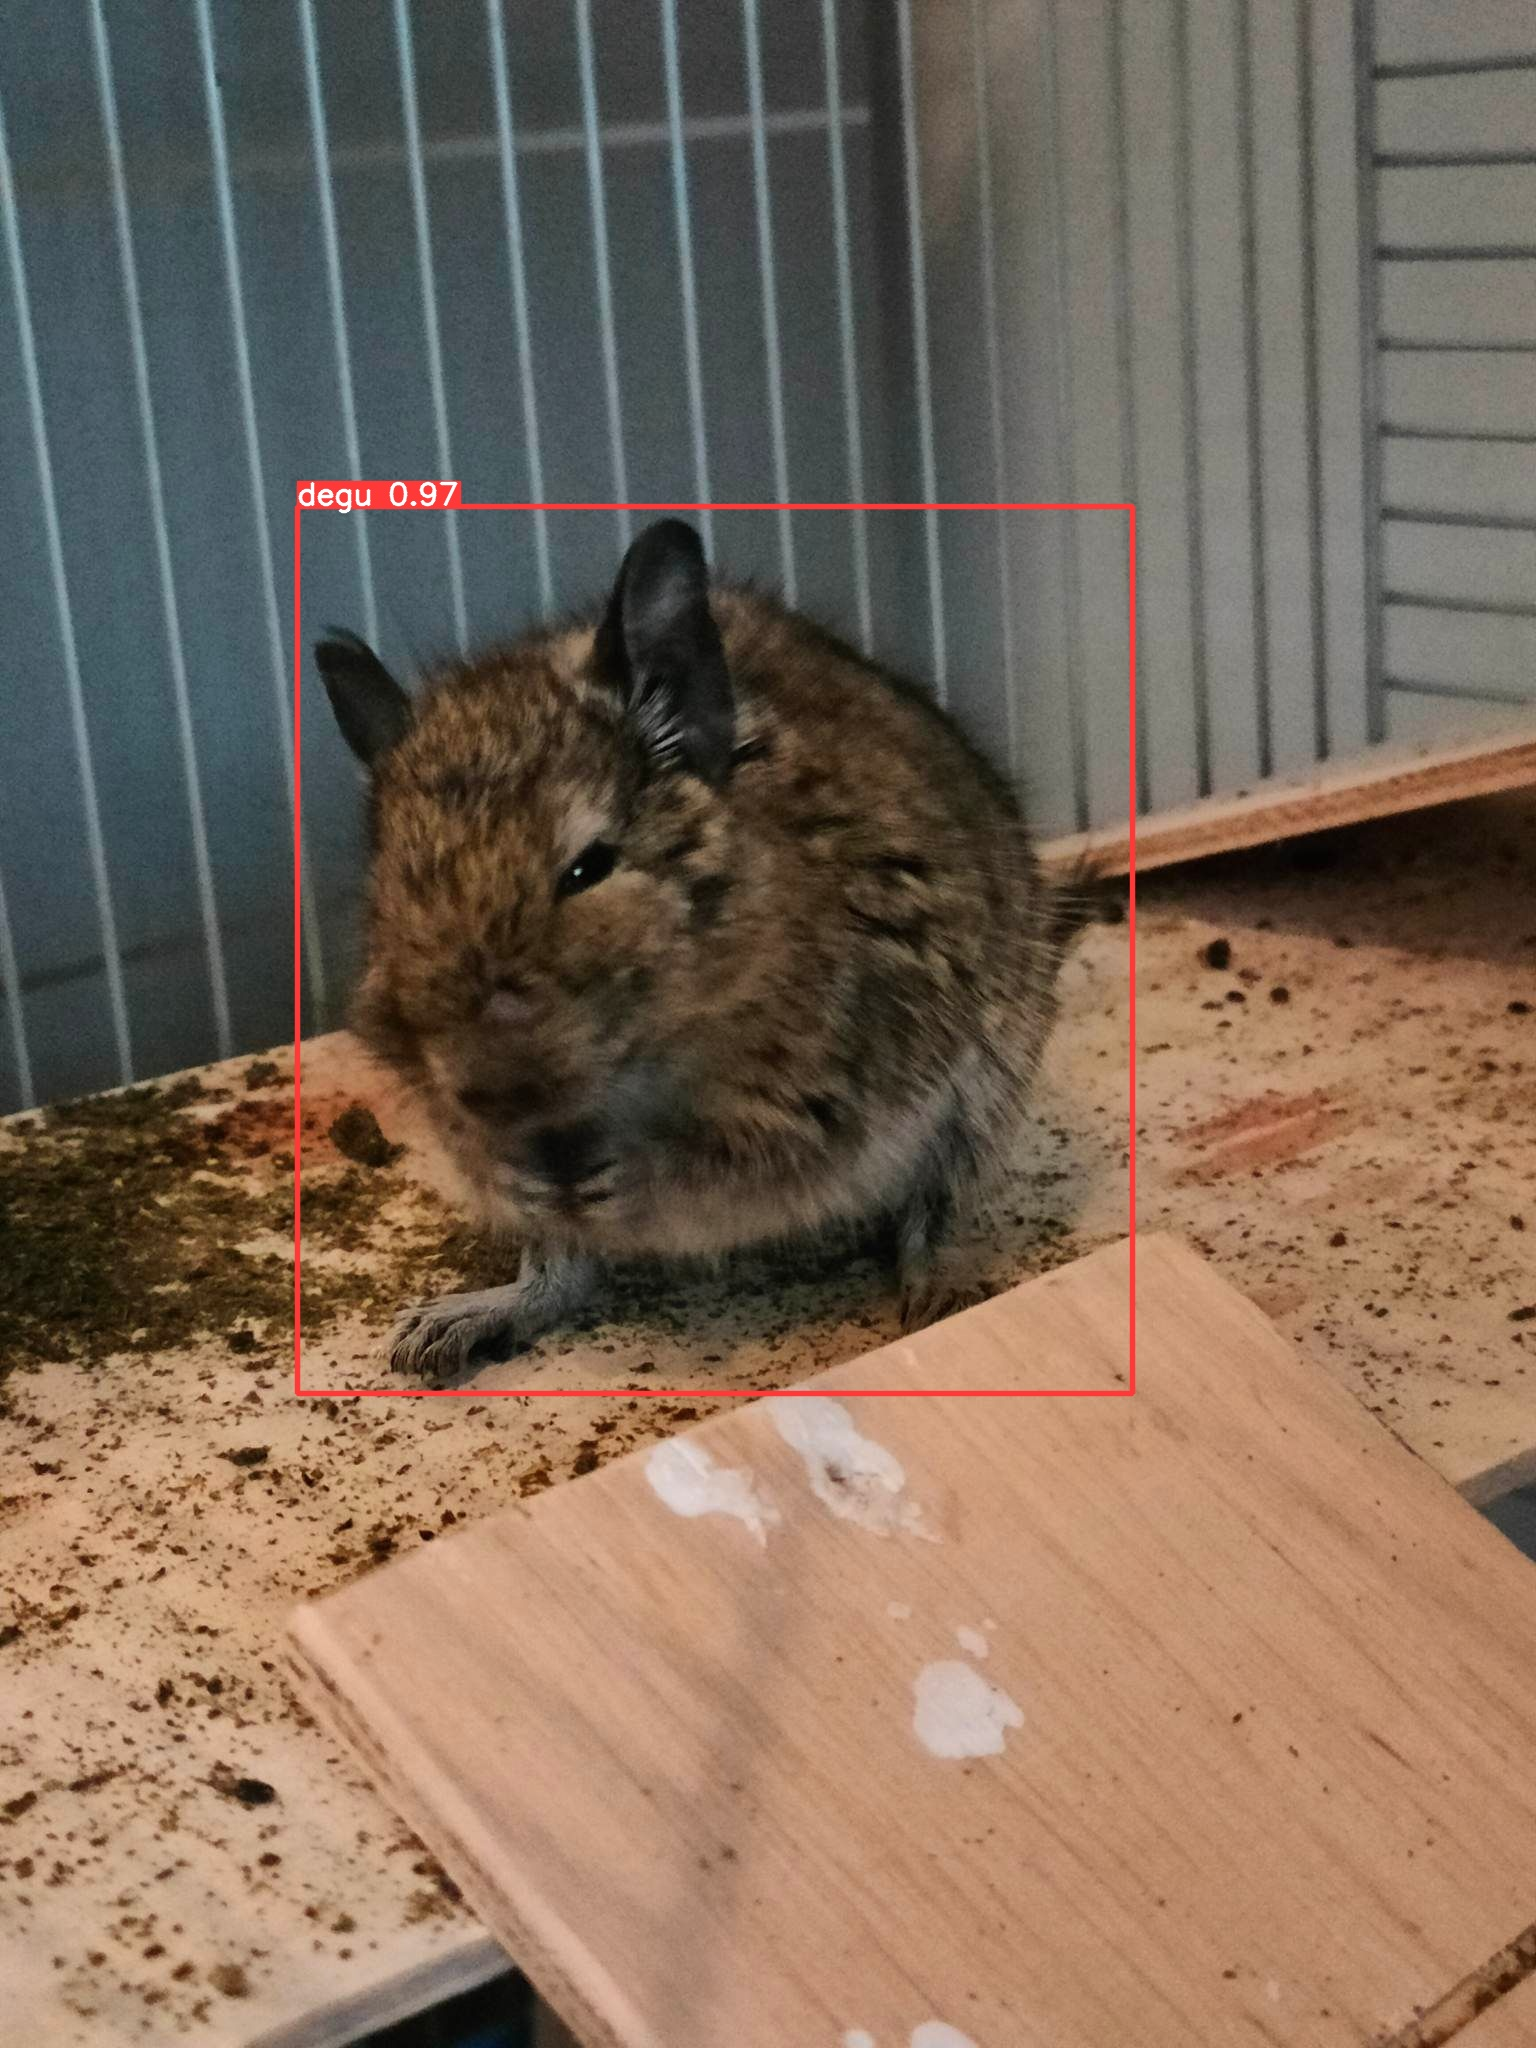

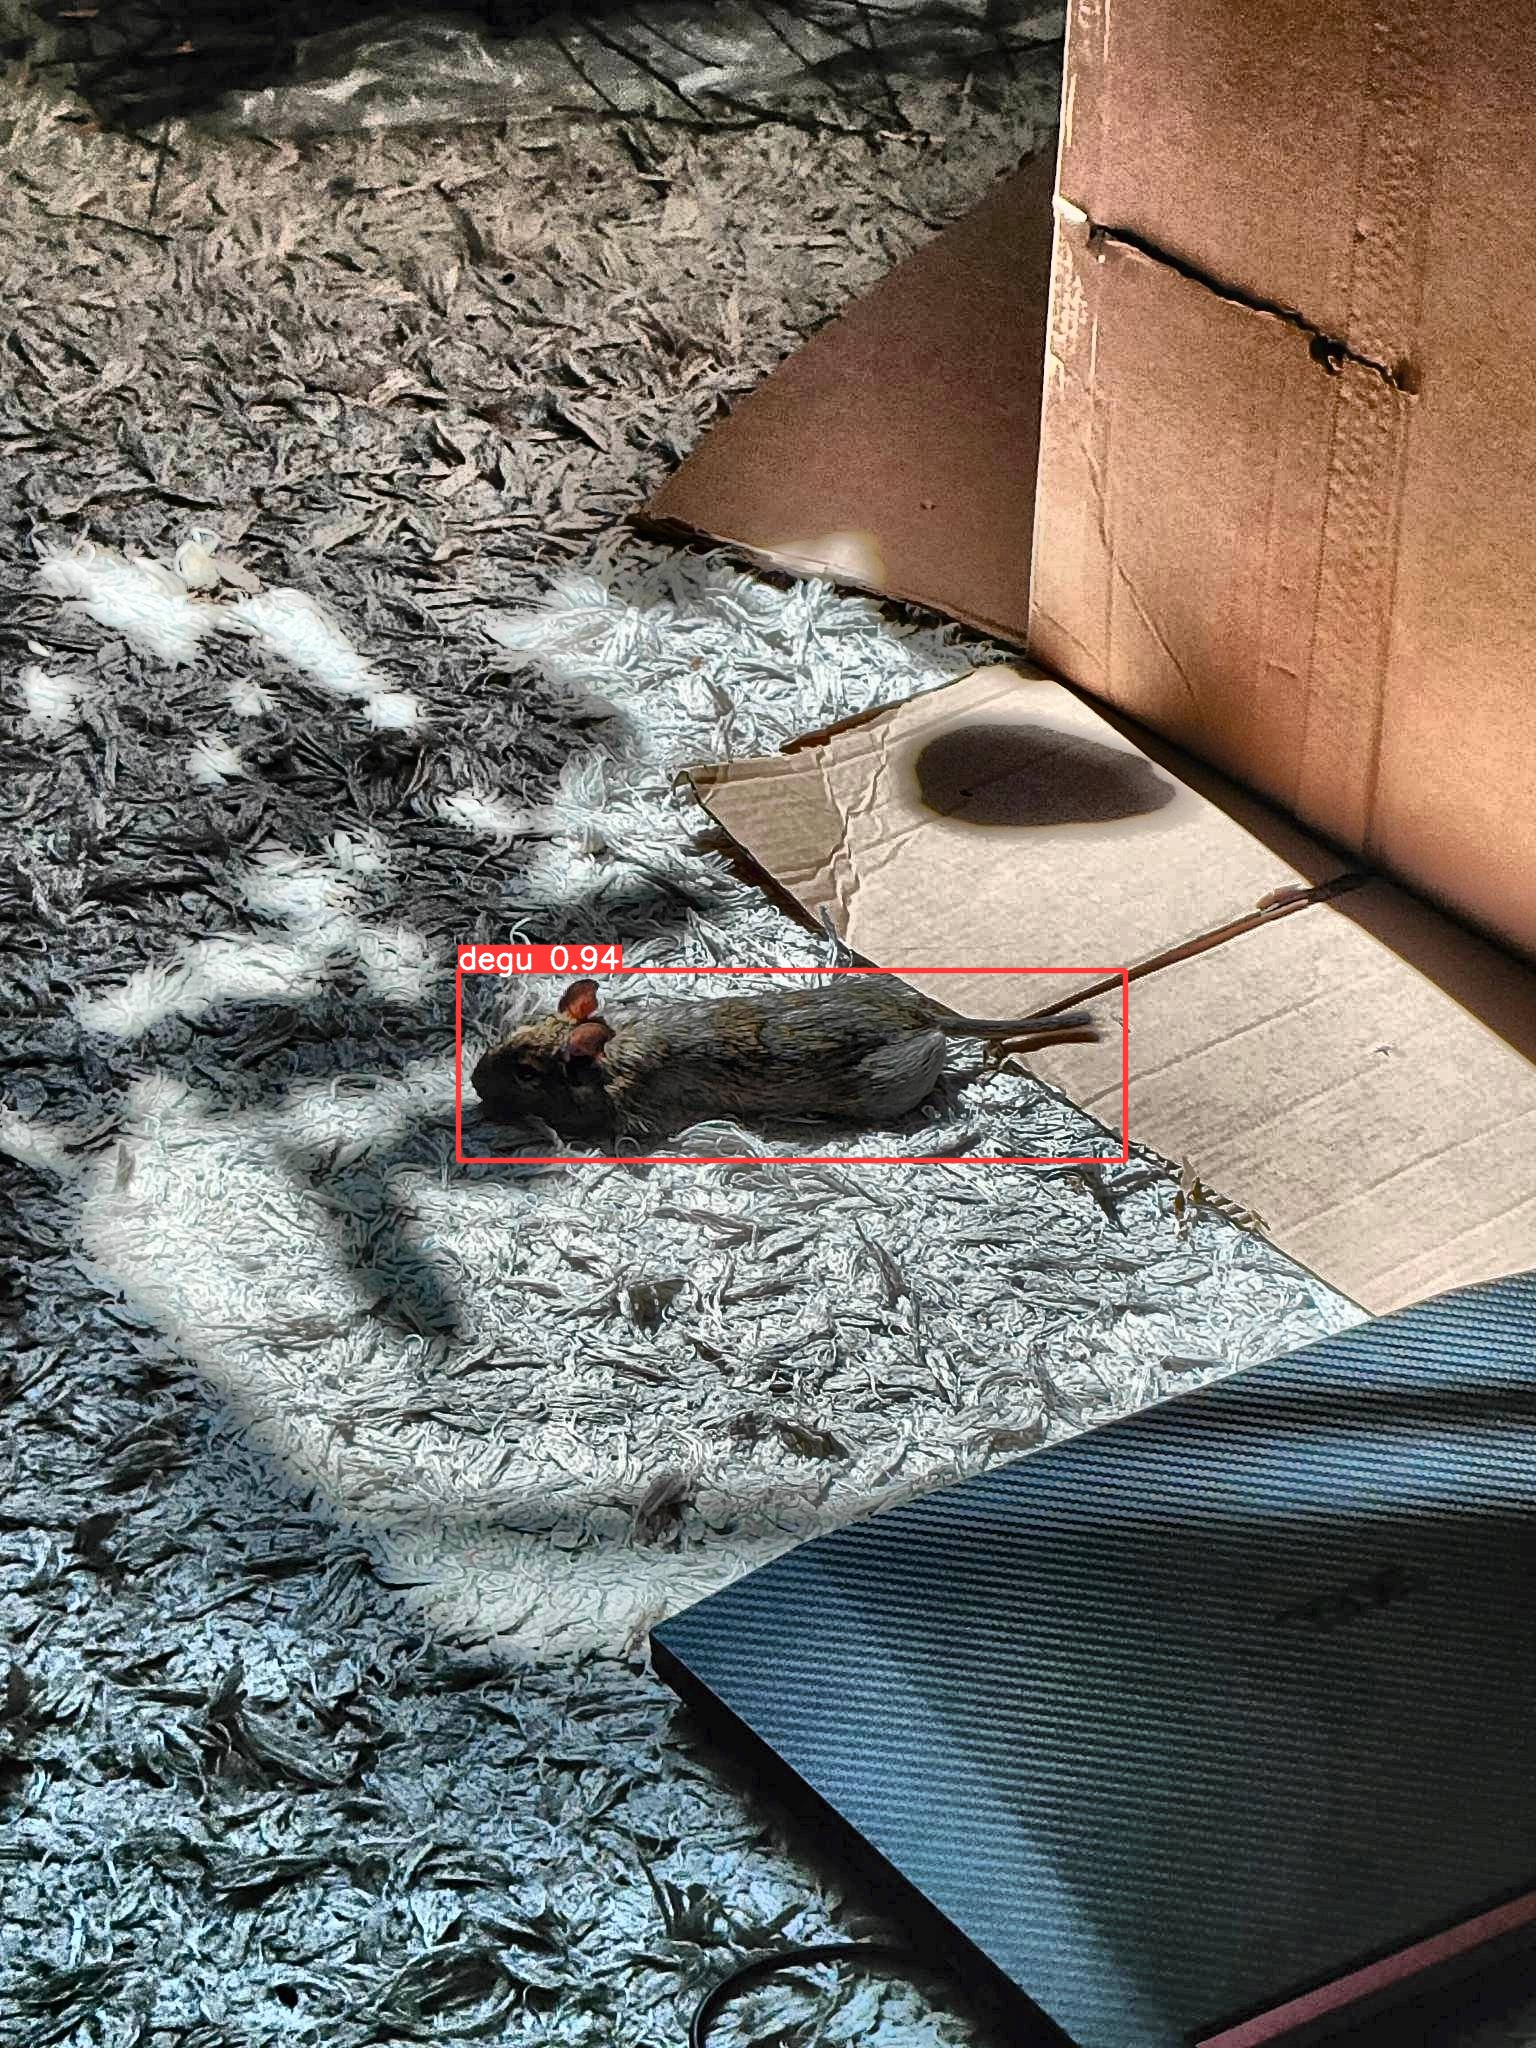

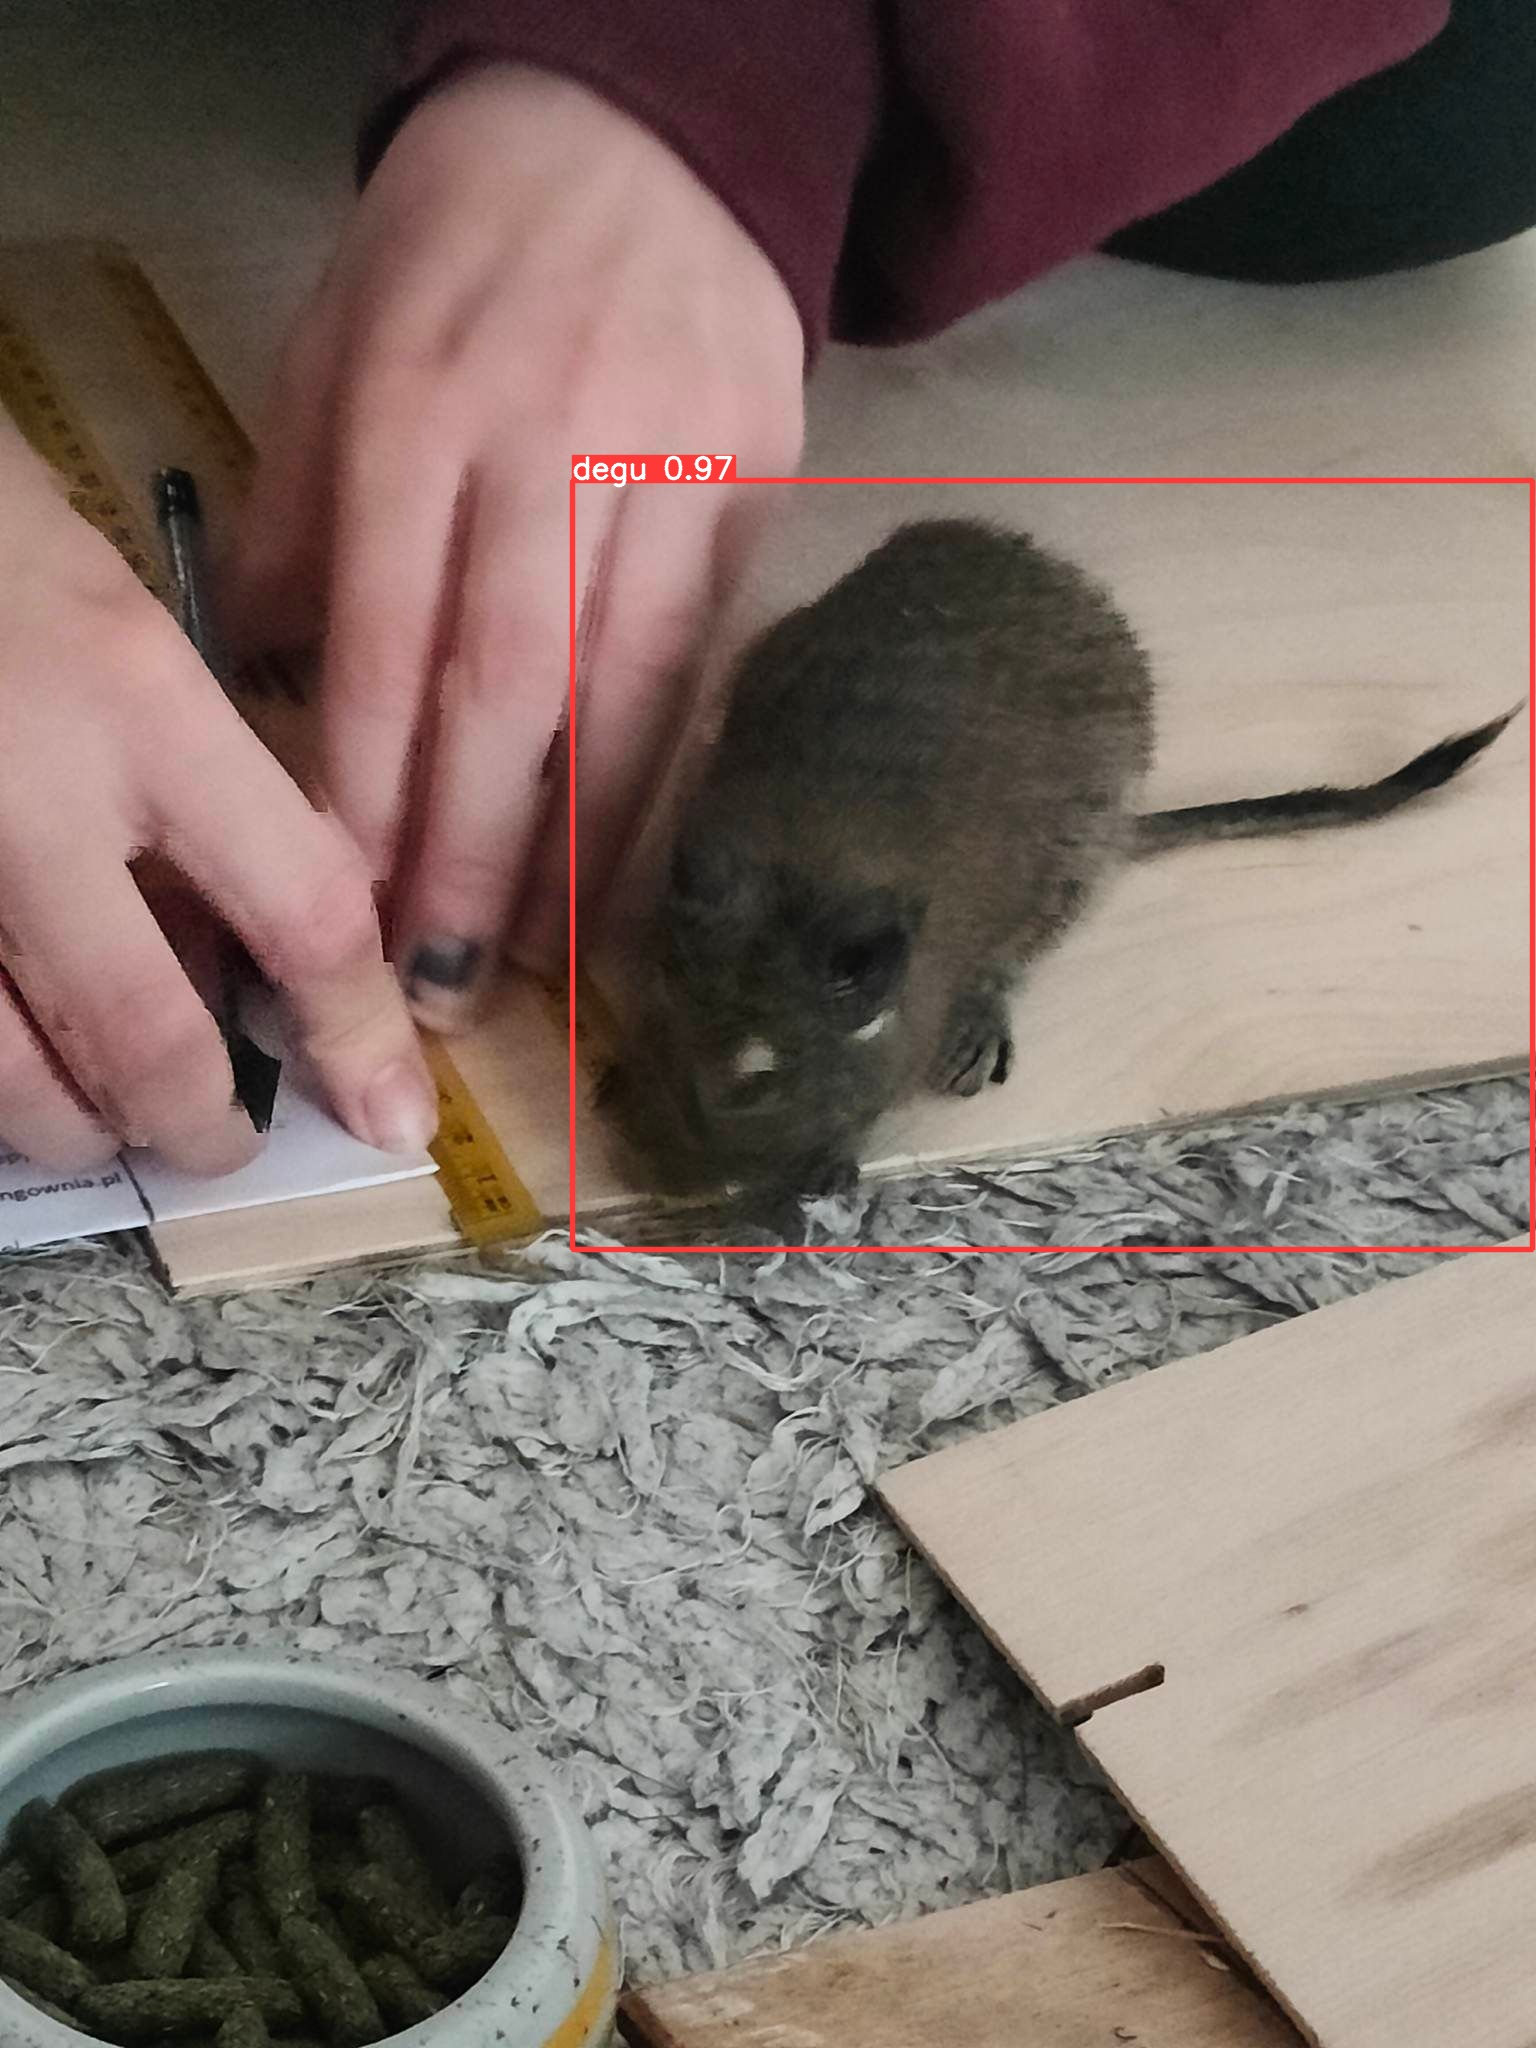

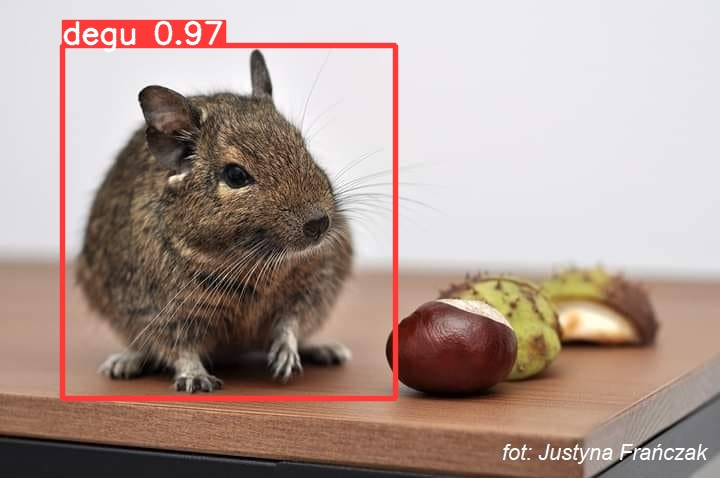

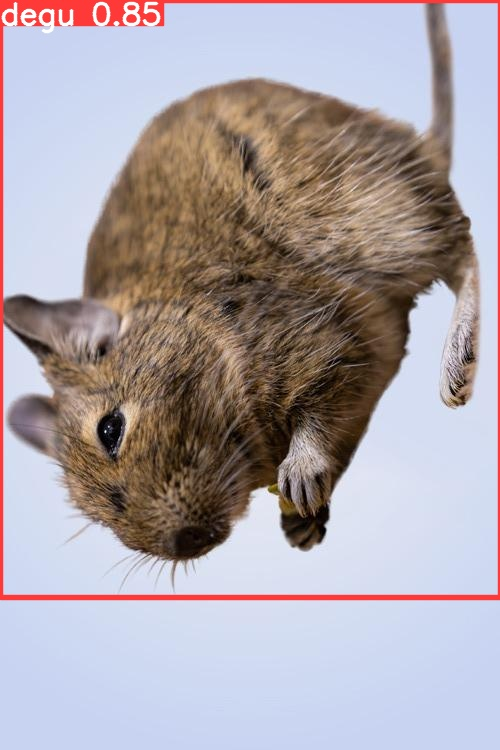

In [15]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
for imageName in glob.glob('/content/yolov5/runs/detect/exp4/*.jpg'): #assuming JPG
    i += 1
    if i < 10:
      display(Image(filename=imageName))
      print("\n")